In [1]:
# Thanks to   https://github.com/cebarnes/cordic/blob/master/cordic.py
# Sumanta: adding plotting functions for cordic rotation
import math
import time
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def create_tan_table(x):
    tan = {}
    for i in range(x):
        tan[2**(-i)] = math.degrees(math.atan(2**(-i)))
    return tan

def find_angle(t):

    x = t[0]
    y = t[1]
    return math.degrees(math.atan(y/x))


def find_An(n):
    An = math.sqrt(2)
    for i in range(1,n):
        An = An * math.sqrt(1 + 2**(-2*i))
    return An



In [6]:
angle=60
n=40 #no of iterations

In [7]:
x,y = 1.0/find_An(n),0.0
z = float(angle)
str_angle = str(angle)
tan_table = create_tan_table(2*n)



<IPython.core.display.Javascript object>


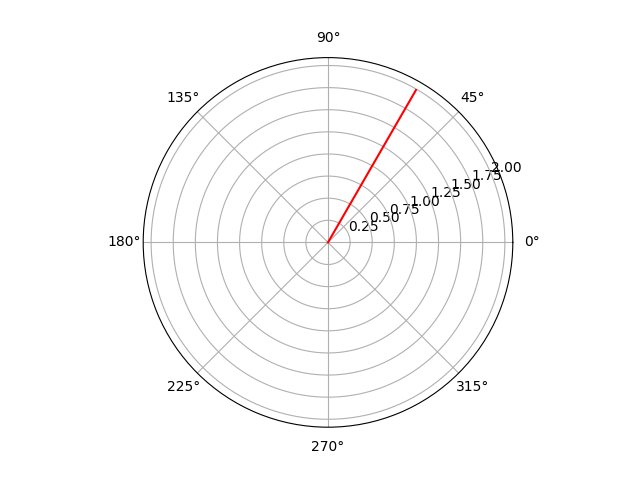

Z=15.0: 45.0
Z=-11.56505117707799: 26.56505117707799
Z=2.4711922908484887: -14.036243467926479
Z=-4.653824058053309: 7.125016348901798
Z=-1.077489683055958: -3.576334374997351
Z=0.7124209251901115: -1.7899106082460694
Z=-0.18275278502096293: 0.8951737102110744
Z=0.2648613858395902: -0.4476141708605531
Z=0.041050885471052095: 0.22381050036853808
Z=-0.0708547915951548: 0.1119056770662069
Z=-0.014901899701351126: -0.055952891893803675
Z=0.01307455291565255: -0.027976452617003676
Z=-0.0009136742266124664: 0.013988227142265016
Z=0.006080439448740453: -0.006994113675352919
Z=0.002583382598036442: 0.003497056850704011
Z=0.0008348541710559924: 0.0017485284269804495
Z=-3.941004263778786e-05: 0.0008742642136937803
Z=0.0003977220642345467: -0.00043713210687233457
Z=0.00017915601079519886: 0.00021856605343934784
Z=6.987298407512737e-05: 0.00010928302672007149
Z=1.5231470715041934e-05: 5.464151336008544e-05
Z=-1.2089285965007e-05: 2.7320756680048934e-05
Z=1.5710923750182426e-06: -1.3660378340025243

In [8]:
%matplotlib notebook

plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111,projection='polar')
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi *np.ones(200)
line,=ax.plot(theta, r, 'r-')
plotangle=0
theta = (np.pi/180)*plotangle*np.ones(200)
line.set_xdata(theta)
fig.canvas.draw()
fig.canvas.flush_events()
for i in range(n+1):
    time.sleep(1)
    if z < 0:
        di = -1.0
    else:
        di = +1.0
    newx = x - (y * di * 2.0**(-i))
    newy = y + (x * di * 2.0**(-i))
    x = newx
    y = newy
    z = z - (di * tan_table[2.0**(-i)])
    print("Z="+str(z)+": "+str(di * tan_table[2.0**(-i)]))
    plotangle=angle-di*z
    theta = (np.pi/180)*plotangle*np.ones(200)
    line.set_xdata(theta)
    fig.canvas.draw()
    fig.canvas.flush_events()
print("cos(angle) = "  + str(x))
print("sin(angle) = "  + str(y))
f = math.degrees(x)
g = math.degrees(y)
